# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [12]:
NAME = "GIN21"
COLLABORATORS = "Szymon Marczak 405302, Dawid Makowski 407894, Tomasz Sanicki 408056"

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [13]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [15]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE

#Proces rergularny

def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    
    tab = np.zeros((grid[0]*grid[1],2)) #tworzę tablicę dla procesu regularnego ze współrzędnymi punktów w tym procesie (incjalizacja zerami)
    dx = (x_lim[1] - x_lim[0]) / grid[0] #ustalam odległość w płaszczyźnie x w równomiernej siatce punktów
    dy = (y_lim[1] - y_lim[0]) / grid[1] #ustalam odległość w płaszczyźnie y w równomiernej siatce punktów
    for i in range(0,grid[0]): #pętla przebiegająca poziomo po punktach
        for j in range(0,grid[1]): #pętla przebiegająca po każdej kolumnie punktów
            #współrzędna punktu = połowa odległości dx/dy (dla początku) + odległość dx razy iteracja + element losowy (w zakresie +-random_component)
            tab[grid[1]*i+j,0] = dx * (i + 0.5) + random_component*(np.random.rand()-0.5)*dx
            tab[grid[1]*i+j,1] = dy * (j + 0.5) + random_component*(np.random.rand()-0.5)*dy
    return tab #zwracam tablicę

#Proces nieregularny o jednorodnej intennsywności

def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    
    x = np.random.poisson(intensity*x_lim[1]*y_lim[1]) #generuję proces Poissona o liczbie punktów wg wzoru liczba = intensywność * pole
    tab = np.zeros((x,2)) #tworzę tablicę zer z tą liczbą punktów
    #Współrzęna = Element losowy w zakresie (zakres = rand(0,1) * (góra - dół) + dół)
    tab[:,0] += [np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0] for i in range(x)]
    tab[:,1] += [np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0] for i in range(x)]
    return tab #zwracam tablicę współrzędnych

#Proces nieregularny o niejednorodnej intensywności
    
def intensity_function (x,y):
    z = 10*(np.cos(np.pi*x/4)+1)
    return z

def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):

    #Tworzę dwie tablice przechowujące 100 liczb między skrajnymi wartościami wspołrzędnych razem tworzących siatkę 100x100
    #(potrzebne będzie do określenia maksymalnej wartości intensywności funkcji)
    x1 = np.array(list(np.linspace(x_lim[0],x_lim[1],100))) #tablica stu liczb 
    y1 = np.array(list(np.linspace(y_lim[0],y_lim[1],100))) #tablica stu liczb
    intensywnosc = max(intensity_function(x1, y1)) #obliczam intensywność funkcji, intensity_function zwraca tablicę wartości tej funkcji i wyłaniamy największą wartość
    x = np.random.poisson(intensywnosc*x_lim[1]*y_lim[1]) #generuję liczbę punktów losowych
    tab = np.zeros((x,2)) #tworzę tablicę zer z tą liczbą punktów
    indeks = 0 #zmienna iterująca po tablicy punktów procesu potomnego zlicza niezerowe punkty tablicy (punkty zerowe są tworzone kiedy nie spełniają warunku w pętli)
    for i in range(x):
        #Współrzęna = Element losowy w zakresie (zakres = rand(0,1) * (góra - dół) + dół)
        tab[indeks,0] += np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0] 
        tab[indeks,1] += np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        #Zgodnie ze wzorem sprawdzam prawdopodobieństwo
        if 1 - intensity_function(tab[indeks,0],tab[indeks,1]) / intensywnosc > np.random.rand():
            #Punktom niepasującym przuspiuję zero
            tab[indeks,:] = 0
        else:
            indeks += 1
    tab_kon = np.zeros((indeks,2)) #tablica zawierająca wynik końcowy w postaci niezerowych punktów procesu
    for i in range(indeks):
        tab_kon[i,:] += tab[i,:] #przypisuję niezerowe wartości procesu potomnego do tablicy (ostatnie wiersze tablicy tab są zerowe)
    return tab_kon #zwracam tablicę współrzędnych
    
#Proces Materna

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):

    x = np.random.poisson(parent_intensity*x_lim[1]*y_lim[1]) #generuję proces rodzicielski
    tab = np.zeros((x,2)) #tablica w której zapiszę punkty procesu rodzicielskiego
    tab[:,0] += [np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0] for i in range(x)] #współrzędna x punktów procesu rodzicielskiego
    tab[:,1] += [np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0] for i in range(x)] #współrzędna y punktów procesu rodzicielskiego
    tab_kluster = np.zeros((x*int(daughter_intensity*np.pi*cluster_radius**2),2)) #generuję proces potomny
    indeks = 0 #zmienna iterująca po tablicy punktów procesu potomnego zlicza niezerowe punkty tablicy (punkty zerowe są tworzone kiedy wychodzą poza zakres)
    liczba_punktow_procesu = int(daughter_intensity*np.pi*cluster_radius**2) #liczba punktów procesu potomnego dla pętli for
    for i in range(x): #pętla przebiegająca po każdym skupieniu (przypada na jeden proces rodzicielski)
        for j in range(liczba_punktow_procesu): #pętla przebiegająca po każdym punkcie w danym skupieniu
            #Generuję punkt w procesie równomiernego rozłożenia w kole
            p = np.random.rand() * 2 * np.pi #losowy kąt
            r = cluster_radius * np.sqrt(np.random.rand()) #losowy promień
            x_wsp_rand = np.cos(p) * r #współrzędna x punktu w kole względem jego środka
            y_wsp_rand = np.sin(p) * r #współrzędna y punktu w kole względem jego środka
            #żeby wpisać współrzędne punktu do tablicy muszę dodać współrzędne środka koła
            tab_kluster[indeks,0] += x_wsp_rand + tab[i,0] #dla x
            tab_kluster[indeks,1] += y_wsp_rand + tab[i,1] #dla y
            #Warunek czy dany punkt znajduje się w zakresie ustalonym w parametrach funkcji (x_lim i y_lim)
            if tab_kluster[indeks,0] > x_lim[1] or tab_kluster[indeks,1] > y_lim[1] or tab_kluster[indeks,0] < x_lim[0] or tab_kluster[indeks,1] < y_lim[0]:
                #jeśli tak to punktowi przypisuję zera (które później zostaną nadpisane, ponieważ nie przesuwam indeksu)
                tab_kluster[indeks,0] = 0
                tab_kluster[indeks,1] = 0
            else:
                #jeśli nie to przesuwam indeks
                indeks += 1
    tab_kon = np.zeros((indeks,2)) #tablica zawierająca wynik końcowy w postaci niezerowych punktów procesu potomnego
    for i in range(indeks):
        tab_kon[i,:] += tab_kluster[i,:] #przypisuję niezerowe wartości procesu potomnego do tablicy (ostatnie wiersz tab_kluster są zerowe)
    return tab_kon #funkcja zwraca tablicę ze współrzędnymi punktów procesu punktowego

#Proces Thomasa

def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    
    x = np.random.poisson(parent_intensity*x_lim[1]*y_lim[1]) #generuję proces rodzicielski
    tab = np.zeros((x,2)) #tablica w której zapiszę punkty procesu rodzicielskiego
    tab[:,0] += [np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0] for i in range(x)] #współrzędna x punktów procesu rodzicielskiego
    tab[:,1] += [np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0] for i in range(x)] #współrzędna y punktów procesu rodzicielskiego
    liczba_punktow_procesu = np.zeros((x,), dtype=int) #tworzę tablicę ile elementów będzie zawierało dane skupienie
    for i in range(x):
        liczba_punktow_procesu[i] = int(np.random.poisson(mean_cluster_size)) #liczba punktów procesu potomnego dla każdego skupienia
    tab_kluster = np.zeros((sum(liczba_punktow_procesu),2)) #tablica współrzędnych punktów procesu potomnego wszystkich skupień
    indeks = 0 #zmienna iterująca po tablicy punktów procesu potomnego zlicza niezerowe punkty tablicy (punkty zerowe są tworzone kiedy wychodzą poza zakres)
    for i in range(x): #pętla przebiegająca po każdym skupieniu (przypada na jeden proces rodzicielski)
        for j in range(liczba_punktow_procesu[i]): #pętla przebiegająca po każdym punkcie w danym skupieniu (tu zakres inny dla każdego skupienia)
            #Generuję losową zmienną dla współrzędnych z rozkładu losowego
            x_wsp_rand = np.random.normal(0, cluster_sigma) #dla x
            y_wsp_rand = np.random.normal(0, cluster_sigma) #dla y
            #Żeby wpisać współrzędne punktu do tablicy muszę dodać współrzędne środka koła
            tab_kluster[indeks,0] += x_wsp_rand + tab[i,0] #dla x
            tab_kluster[indeks,1] += y_wsp_rand + tab[i,1] #dla y
            #Warunek czy dany punkt znajduje się w zakresie ustalonym w parametrach funkcji (x_lim i y_lim)
            if tab_kluster[indeks,0] > x_lim[1] or tab_kluster[indeks,1] > y_lim[1] or tab_kluster[indeks,0] < x_lim[0] or tab_kluster[indeks,1] < y_lim[0]:
                #jeśli tak to punktowi przypisuję zera (które później zostaną nadpisane, ponieważ nie przesuwam indeksu)
                tab_kluster[indeks,0] = 0
                tab_kluster[indeks,1] = 0
            else:
                #jeśli nie to przesuwam indeks
                indeks += 1
    tab_kon = np.zeros((indeks,2)) #tablica zawierająca wynik końcowy w postaci niezerowych punktów procesu potomnego
    for i in range(indeks):
        tab_kon[i,:] += tab_kluster[i,:] #przypisuję niezerowe wartości procesu potomnego do tablicy (ostatnie wiersz tab_kluster są zerowe)
    return tab_kon #funkcja zwraca tablicę ze współrzędnymi punktów procesu punktowego

tab_homo_poisson = homogeneous_poisson_on_rectangle(20, [-10,10], [-5,5])
tab_unhom_poisson = unhomogeneous_poisson_on_rectangle(intensity_function, [-10,10], [-5,5])
tab_matern = materna_on_rectangle(0.3, 15, 1.25, [-10,10], [-5,5])
tab_thomas = thomas_on_rectangle(0.3, 20, 0.75, [-10,10], [-5,5])

#raise NotImplementedError()

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [16]:
# YOUR CODE HERE
tab1=pd.read_csv("./dane_tymczasowe_HP.csv")
tab2=pd.read_csv("./dane_tymczasowe_M.csv")
tab3=pd.read_csv("./dane_tymczasowe_T.csv")
tab4=pd.read_csv("./dane_tymczasowe_UP.csv")
#raise NotImplementedError()

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (20 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

#### a) Przygotowanie funkcji

In [17]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    # YOUR CODE HERE 
    return np.histogram2d(points[:,0],points[:,1],bins=bins,range=[x_lim,y_lim])
    #raise NotImplementedError()

def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    # YOUR CODE HERE
    liczba_punktow_z_siatka = point_count_on_subregions(points,bins,x_lim,y_lim)
    liczba_punktow = liczba_punktow_z_siatka[0]
    intensywnosc = np.zeros((bins[0], bins[1]))
    obszar = (x_lim[1] - x_lim[0]) * (y_lim[1] - y_lim[0]) / (bins[0] * bins[1])
    for i in range(bins[0]):
        for j in range(bins[1]):
            liczba = liczba_punktow[i,j]
            intensywnosc[i,j] = liczba / obszar
    tupel = tuple((liczba_punktow_z_siatka[1], liczba_punktow_z_siatka[2], intensywnosc))
    return tupel
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [18]:
# YOUR CODE HERE

zad1 = intensity_on_subregions(tab_thomas, [20,40], [-10,10], [-5,5]) #Miejsce do wybrania procesu

#raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Mapa intensywności procesu punktowego w podobszarach')

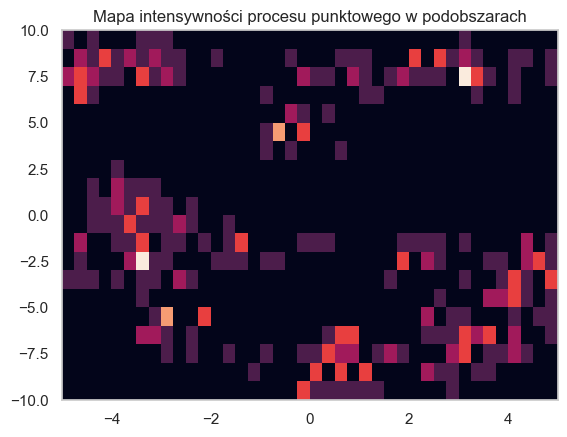

In [20]:
# YOUR CODE HERE

plt.pcolormesh(zad1[1], zad1[0], zad1[2])
plt.title("Mapa intensywności procesu punktowego w podobszarach")


#raise NotImplementedError()

### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (25 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Następnie wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

Uwaga! Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [25]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # YOUR CODE HERE
   
    tab = np.zeros((grid[0 ]* grid[1], 3))
    siatka = np.zeros((grid[0] * grid[1], 2))
    x = np.linspace(x_lim[0], x_lim[1], grid[0])
    y = np.linspace(y_lim[0], y_lim[1], grid[1])
    xs,ys = np.meshgrid(x, y)
    x = xs.flatten()
    y = ys.flatten()
    
    odleglosci = 0
    intensywnosci = 0
    
    for i in range(np.shape(x)[0]):
        intensywnosci = 0
        for j in range(len(points)):
            odleglosci = np.sqrt((points[j,0] - x[i])**2 + (points[j,1] - y[i])**2)
            if odleglosci < kernel_radius:
                intensywnosci += (3/(np.pi * kernel_radius**2)) * (1 - (odleglosci**2/kernel_radius**2))
        tab[i,0] = x[i]
        tab[i,1] = y[i]
        tab[i,2] = intensywnosci
        
    return tab

    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [26]:
# YOUR CODE HERE

zad2 = intensity_on_kde(tab_matern, 1.5, [40,20], [-10,10], [-5,5]) #Miejsce do wybrania procesu

#raise NotImplementedError()

#### c) Wizualizacja

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

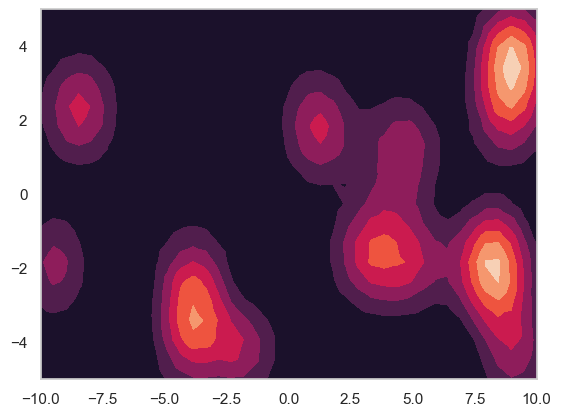

In [27]:
# YOUR CODE HERE

plt.tricontourf(zad2[:,0],zad2[:,1],zad2[:,2])
sns.scatterplot(tab_matern[:,0], tab_matern[:,1], s = 10) #Miejsce do wybrania procesu (musi być zgodny z tym, wybranym w funkcji intensity_on_kde())
plt.title("Mapa intensywności procesu punktowego")
plt.xlabel("X")
plt.ylabel("Y")

#raise NotImplementedError()